In [1]:
import cv2, math, warnings
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np
from nail_meta import *
warnings.filterwarnings('ignore')

raw_mask = cv2.imread("hand_mask.jpg")
raw_hand = cv2.imread("hand_raw.jpg")
raw_nail = cv2.imread("nail.jpg")

426 717 526 702
(291, 176, 3)
81 353 379 545
(272, 166, 3)
4 306 229 413
(302, 184, 3)
122 374 136 290
(252, 154, 3)
304 516 72 201
(212, 129, 3)


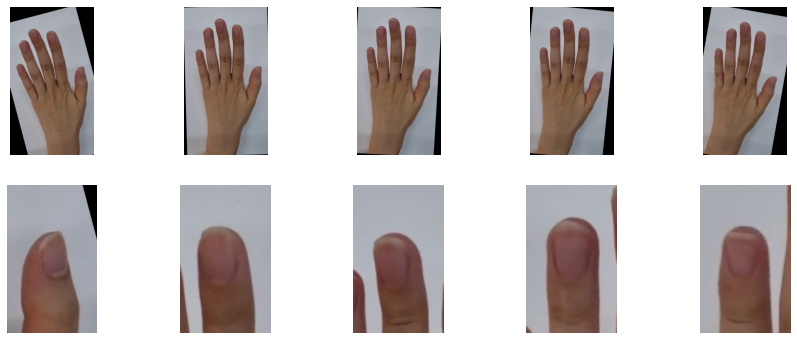

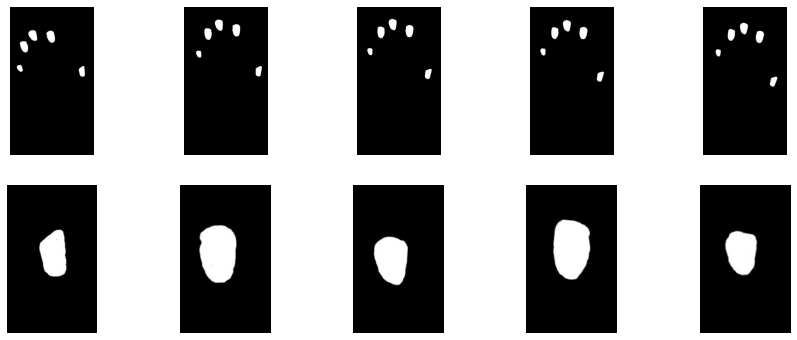

In [2]:
img, point, index = find_point(cv2.cvtColor(raw_hand, cv2.COLOR_BGR2RGB))
rotation_finger(cv2.cvtColor(raw_hand, cv2.COLOR_BGR2RGB), point)
mask0, mask1, mask2, mask3, mask4 = rotation_mask(raw_mask, point)

target_mask = mask0
resized_img_nail = cv2.resize(raw_nail, (target_mask.shape[1],target_mask.shape[0]))
resized_img_nail = np.where(resized_img_nail>190, 0, resized_img_nail)

In [3]:
n_pts1, n_pts2, n_pts3 = nail_pts(resized_img_nail)

In [4]:
m_pts1, m_pts2, m_pts3 = nail_pts(target_mask)

(291, 176, 3)


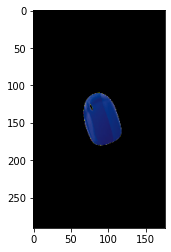

In [8]:
rows, cols = resized_img_nail.shape[:2]

# 변환 전
before_pts = np.float32([n_pts1, n_pts2, n_pts3])
# 변환 후
after_pts = np.float32([m_pts1, m_pts2, m_pts3])

mtrx = cv2.getAffineTransform(before_pts, after_pts)
dst = cv2.warpAffine(resized_img_nail, mtrx, (cols, rows))

print(dst.shape)
plt.imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB));

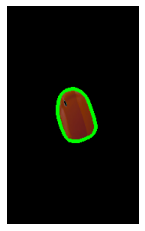

In [9]:
mask_1010 =dst.copy()
b,g,r = cv2.split(mask_1010)
img2 = cv2.merge([r,g,b])

edge = cv2.dilate(img2, None)

blur = cv2.GaussianBlur(img2, ksize = (3, 3), sigmaX = 0)
edged = cv2.Canny(blur, 200, 255)       # 경계선 따기

plt.axis('off'), plt.imshow(edged);

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel) 
plt.imshow(closed);

contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)       

contours_image = cv2.drawContours(mask_1010.copy(), contours, -1, (0,255,0), 3)
plt.axis('off'), plt.imshow(contours_image);

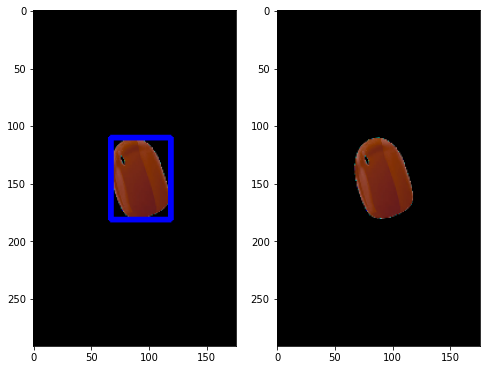

In [10]:
img1 = mask_1010.copy()
img2 = mask_1010.copy()
img3 = mask_1010.copy()

cnt = contours[0]

# Striaght Bounding Rectangle
x, y, w, h = cv2.boundingRect(cnt)
cv2.rectangle(img1, (x,y), (x+w, y+h), (0, 0, 255), 3)

# Rotated Rectangle
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
# cv2.drawContours(img2, [box], 0, (0, 255, 0), 3)

images =[img1, img2]
title = ['straight', 'rotated']
plt.figure(figsize=(8,8))
for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.imshow(images[i])

In [11]:
img5 = mask_1010.copy()

contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)    
print("num of contours: {}".format(len(contours)))

num of contours: 1


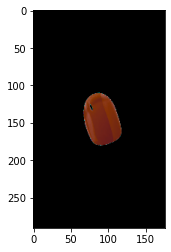

In [12]:
croppedRotated = rot_crop_box(img5, contours) # 함수 적용

In [13]:
resized_croppedRotated = cv2.resize(croppedRotated,(raw_hand.shape[1],raw_hand.shape[0]))

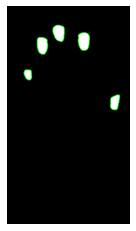

In [14]:
mask_1010 =raw_mask.copy()
b,g,r = cv2.split(mask_1010)
img2 = cv2.merge([r,g,b])

edge = cv2.dilate(img2, None)

blur = cv2.GaussianBlur(img2, ksize = (3, 3), sigmaX = 0)
edged = cv2.Canny(blur, 200, 255)       # 경계선 따기

plt.axis('off'), plt.imshow(edged);

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel) 
plt.imshow(closed);

contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)       

contours_image = cv2.drawContours(mask_1010.copy(), contours, -1, (0,255,0), 3)
plt.axis('off'), plt.imshow(contours_image);

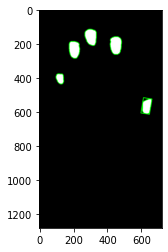

In [15]:
img1 = mask_1010.copy()
img2 = mask_1010.copy()
img3 = mask_1010.copy()

cnt = contours[0]

# Striaght Bounding Rectangle
x, y, w, h = cv2.boundingRect(cnt)
cv2.rectangle(img1, (x,y), (x+w, y+h), (0, 0, 255), 3)

# Rotated Rectangle
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)

cv2.drawContours(contours_image, [box], 0, (0, 255, 0), 3)
plt.imshow(contours_image);

In [16]:
practice_hand = raw_hand.copy()

(1280, 720, 3)


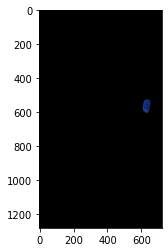

In [17]:
rows, cols = raw_hand.shape[:2]
final_before = np.float32([ [0, 0], [cols, 0], [0, rows], [cols, rows] ])
# 변환 후
final_after = np.float32([box[1], box[2],box[0],box[3]])

mtrx2 = cv2.getPerspectiveTransform(final_before, final_after)
dst2 = cv2.warpPerspective(resized_croppedRotated, mtrx2, (cols, rows))

print(dst2.shape)
plt.imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB));

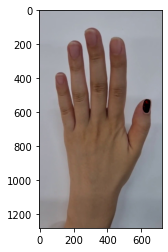

In [18]:
finger1 = cv2.subtract(practice_hand, dst2)
for i in range(5):
    finger1 = cv2.subtract(finger1, dst2)
plt.imshow(cv2.cvtColor(cv2.subtract(finger1, dst2),cv2.COLOR_BGR2RGB));

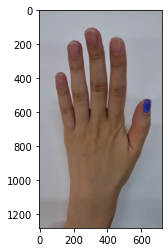

In [19]:
finger1 = cv2.add(finger1, dst2)
plt.imshow(cv2.cvtColor(finger1,cv2.COLOR_BGR2RGB));